# Εργασία 2  Δέντρα Απόφασης & Τυχαία Δάση


Κωνσταντίνα Μαρίνα Μπλέτσα, ΑΕΜ 243

# Εισαγωγή Βιβλιοθηκών

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from itertools import product
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Εισαγωγή Δεδομένων

In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Ερώτημα 1

Στατιστικά Στοιχεία

In [3]:
print(df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


Δημιουργία Ιστογραμμάτων

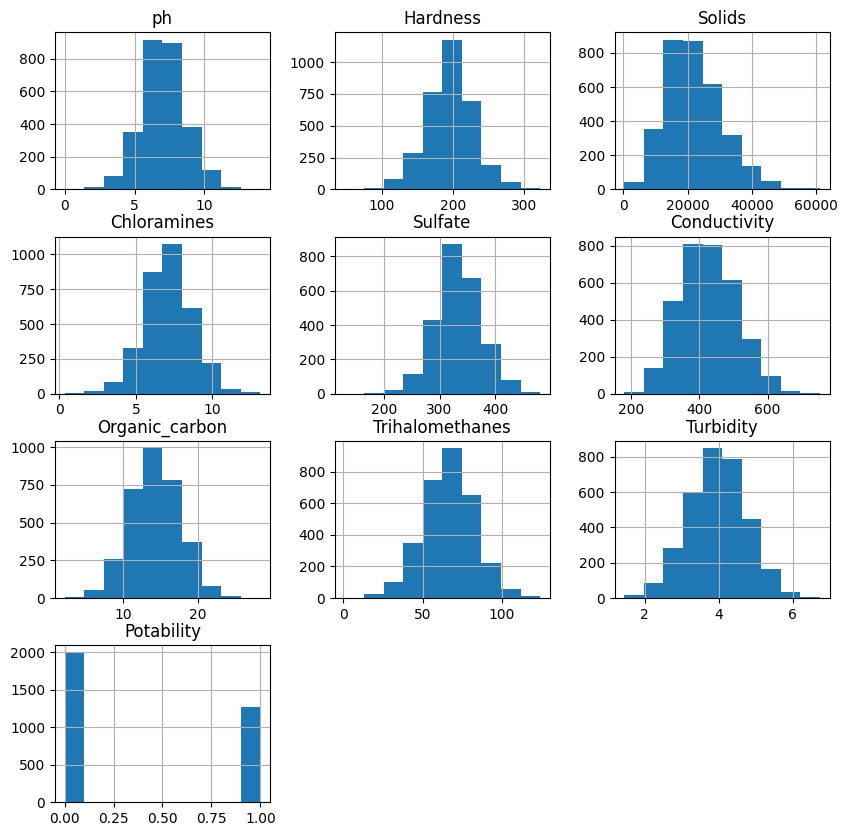

In [4]:
df.hist(figsize=(10, 10))
plt.show()

Δημιουργία Ραβγογράμματος για το Potability

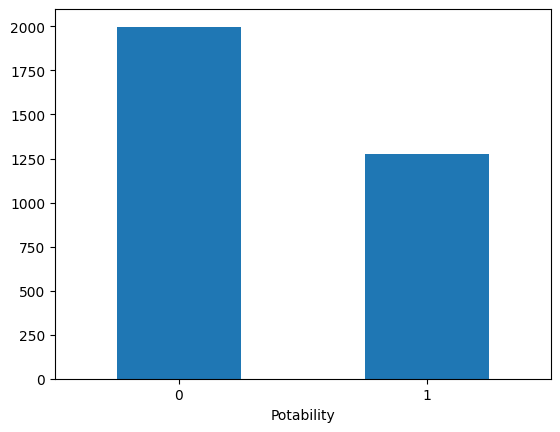

In [5]:
df['Potability'].value_counts().plot(kind='bar')
plt.xlabel('Potability')
plt.xticks(rotation=0)
plt.show()

Πλήθος των ελλειπών τιμών ανά χαρακτηριστικό

In [6]:
missing_values = df.isnull().sum()
print("Πλήθος ελλειπών τιμών ανά χαρακτηριστικό:\n", missing_values)

Πλήθος ελλειπών τιμών ανά χαρακτηριστικό:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Ποσοστά πόσιμου και μη-πόσιμου νερού

In [7]:
labels = {0: 'Όχι πόσιμο', 1: 'Πόσιμο'}
percents = df['Potability'].map(labels).value_counts(normalize=True).mul(100).round(2)

print("Ποσοστά πόσιμου και μη πόσιμου νερού (%):\n", percents)

Ποσοστά πόσιμου και μη πόσιμου νερού (%):
 Potability
Όχι πόσιμο    60.99
Πόσιμο        39.01
Name: proportion, dtype: float64


Ποιότητα των Δεδομένων

Η ποιότητα των δεδομένων του dataset θεωρείται μέτρια προς ικανοποιητική, κάποια χαρακτηριστικά, όπως το pH και το Sulfate, παρουσιάζουν μεγάλο ποσοστό ελλειπουσών τιμών (περίπου 15% και 24% αντίστοιχα), ενώ η μεταβλητή Trihalomethanes έχει περίπου 5% ελλείψεις, τα υπόλοιπα χαρακτηριστικά δεν έχουν ελλείψεις. Η κατανομή της μεταβλητής Potability δείχνει ότι το 60,99% των δειγμάτων αντιστοιχεί σε μη πόσιμο νερό και το 39,01% σε πόσιμο, κάτι που δείχνει μια ανισορροπία, αλλά όχι σε πολύ μεγάλο βαθμό που να καθιστά τα δεδομένα αναξιόπιστα.

# Ερώτημα 2

Υπολογισμός ποσοστών πόσιμου και μη-πόσιμου νερού των παραδειγμάτων για α) pH<6.5, β) 6.5≤pH≤8.5 και η) 8.5<pH.

In [8]:
low_ph = df[df['ph'] < 6.5]
normal_ph = df[(df['ph'] >= 6.5) & (df['ph'] <= 8.5)]
high_ph = df[df['ph'] > 8.5]

def potability_percent(subset):
    return (subset['Potability'].value_counts(normalize=True) * 100).round(2)

low_ph_percent = potability_percent(low_ph)
normal_ph_percent = potability_percent(normal_ph)
high_ph_percent = potability_percent(high_ph)

print("a) pH < 6.5:")
print(low_ph_percent.to_string(), "\n")

print("b) 6.5 ≤ pH ≤ 8.5:")
print(normal_ph_percent.to_string(), "\n")

print("c) pH > 8.5:")
print(high_ph_percent.to_string())

a) pH < 6.5:
Potability
0    63.22
1    36.78 

b) 6.5 ≤ pH ≤ 8.5:
Potability
0    56.1
1    43.9 

c) pH > 8.5:
Potability
0    66.87
1    33.13


Σύμφωνα με τις οδηγίες του ΠΟΥ, το νερό θεωρείται κατάλληλο για κατανάλωση όταν το pH του βρίσκεται μεταξύ 6.5 και 8.5, αυτό επιβεβαιώνεται εν μέρη στα δεδομένα μας αφου στο εύρος 6.5 ≤ pH ≤ 8.5, το ποσοστό πόσιμου νερού είναι το υψηλότερο που εμφανίζεται 43.9% ενώ το ποσοστό μη πόσιμου νερού είναι 56.1% δηλαδή το μικρότερο από όλες τις κατηγορίες.

Αντίθετα, για pH < 6.5 ή pH > 8.5, τα ποσοστά πόσιμου νερού μειώνονται 36.8% και 33.1% αντίστοιχα,
κάτι που δείχνει ότι ακραίες τιμές pH σχετίζονται με μειωμένη πιθανότητα πόσιμου νερού αλλά όχι μόνο με αυτήν.


# Ερώτημα 3

Διάγραμμα Διασποράς μεταξύ pH και Chloramine

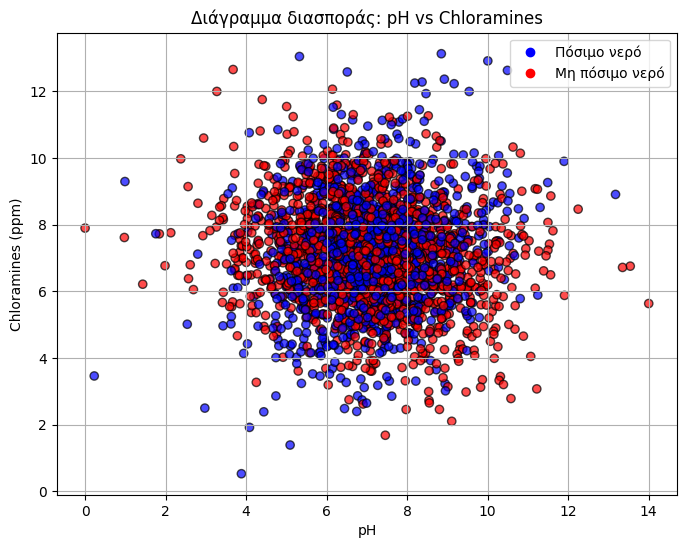

In [9]:
colors = df['Potability'].map({1: 'blue', 0: 'red'})

plt.figure(figsize=(8,6))
plt.scatter(df['ph'], df['Chloramines'], c=colors, alpha=0.7, edgecolor='k')
plt.title("Διάγραμμα διασποράς: pH vs Chloramines")
plt.xlabel("pH")
plt.ylabel("Chloramines (ppm)")
plt.grid(True)
plt.legend(handles=[
    plt.Line2D([], [], color='blue', marker='o', linestyle='', label='Πόσιμο νερό'),
    plt.Line2D([], [], color='red', marker='o', linestyle='', label='Μη πόσιμο νερό')
])
plt.show()


Διαχωρισιμότητα των παραδειγμάτων στο Διάγραμμα Διασποράς

Το παραπάνω διάγραμμα διασποράς δείχνει τη σχέση μεταξύ του pH και των Chloramines, τα μπλε σημεία αναπαριστούν τα πόσιμα δείγματα και κόκκινα τα μη πόσιμα.Τα σημεία των δύο κατηγοριών (πόσιμα και μη πόσιμα) επικαλύπτονται σε μεγάλο βαθμό και δεν έχουν καθαρό διαχωρισμό μεταξύ τους.

Επίσης παρόλο που ο ΠΟΥ βάζει το όριο των 4 ppm για τις χλωραμίνες, τα περισσότερα δείγματα βρίσκονται πάνω από αυτήν, τόσο τα πόσιμα όσο και τα μη πόσιμα δείγματα εμφανίζονται σε παρόμοια επίπεδα pH και Chloramines, συνεπώς η διαχωρισιμότητα των παραδειγμάτων με βάση μόνο αυτά τα δύο χαρακτηριστικά είναι χαμηλή αφού δεν φαίνεται να υπάρχει ξεκάθαρη γραμμή ή περιοχή που να ξεχωρίζει τα πόσιμα από τα μη πόσιμα δείγματα.

# Ερώτημα 4

Συμπλήρωση των ελλειπουσών τιμών του Dataset με τη μέση τιμή κάθε στήλης

In [10]:
df = df.fillna(df.mean(numeric_only=True))

print("\nΕλλείπουσες τιμές ανά χαρακτηριστικό (μετά τη συμπλήρωση):")
print(df.isnull().sum())


Ελλείπουσες τιμές ανά χαρακτηριστικό (μετά τη συμπλήρωση):
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


# Ερώτημα 5

Δημιουργία numpy arrays

In [11]:
input_df = df.drop(columns=['Potability'])
targets_df = df['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((3276, 9), (3276,))

Χωρισμός δεδομένων σε train-test σε ποσοστό 70-30% αντίστοιχα με 0 seed.

In [12]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

# Ερώτημα 6

Εκπαίδευση του ταξινομητή Δέντρο Απόφασης (Decision Tree)

In [13]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

Πρόβλεψη και Αξιολόγηση

In [14]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Ακρίβεια στο train set: {train_acc:.4f}")
print(f"Ακρίβεια στο test set: {test_acc:.4f}")

Ακρίβεια στο train set: 1.0000
Ακρίβεια στο test set: 0.5748


# Ερώτημα 7

Εμφάμιση Πίνακα Ακίβειας μετά την δοκιμή άλλων παραμέτρων του Δένδρου Απόφασης

In [15]:
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_opts = [None, 'sqrt']
ccp_alpha = [0, 0.01]

combinations = list(product(criteria, max_depths, min_samples_splits,
                            min_samples_leafs, max_features_opts, ccp_alpha))

results = []

for (criterion, max_depth, min_split, min_leaf, max_feat, alpha) in combinations:
    clf = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf,
        max_features=max_feat,
        ccp_alpha=alpha,
        random_state=0
    )
    clf.fit(x_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(x_train))
    test_acc = accuracy_score(y_test, clf.predict(x_test))

    results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_split,
        'min_samples_leaf': min_leaf,
        'max_features': max_feat,
        'ccp': alpha,
        'train_acc': round(train_acc, 4),
        'test_acc': round(test_acc, 4)
    })

results_df = pd.DataFrame(results)
print("\nΠίνακας ακρίβειας (train/test) για κάθε συνδυασμό παραμέτρων:\n")
display(results_df)


Πίνακας ακρίβειας (train/test) για κάθε συνδυασμό παραμέτρων:



,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp,train_acc,test_acc
0,gini,NaN,2,1,None,0.00,1.0000,0.5748
1,gini,NaN,2,1,None,0.01,0.6053,0.6205
2,gini,NaN,2,1,sqrt,0.00,1.0000,0.6226
3,gini,NaN,2,1,sqrt,0.01,0.6053,0.6205
4,gini,NaN,2,2,None,0.00,0.9516,0.5819
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,1,sqrt,0.01,0.6201,0.6267
92,entropy,5.0,5,2,None,0.00,0.6712,0.6551
93,entropy,5.0,5,2,None,0.01,0.6201,0.6267
94,entropy,5.0,5,2,sqrt,0.00,0.6428,0.6205


# Ερώτημα 8

Επανεκπαίδευση του Δένδρου Απόφασης στον συνδυασμό με τη μεγαλύτερη ακρίβεια στο test set όταν max-depth = 3.

In [16]:
filtered = results_df[results_df['max_depth'] == 3]

best_row = filtered.loc[filtered['test_acc'].idxmax()]
print("Καλύτερος συνδυασμός για max_depth=3:\n")
print(best_row)


Καλύτερος συνδυασμός για max_depth=3:

criterion            entropy
max_depth                3.0
min_samples_split          2
min_samples_leaf           1
max_features            None
ccp                      0.0
train_acc             0.6411
test_acc              0.6399
Name: 64, dtype: object


In [17]:
best_tree = DecisionTreeClassifier(
    criterion=str(best_row['criterion']),
    max_depth=int(best_row['max_depth']) if not pd.isna(best_row['max_depth']) else None,
    min_samples_split=int(best_row['min_samples_split']),
    min_samples_leaf=int(best_row['min_samples_leaf']),
    max_features=None if pd.isna(best_row['max_features']) else str(best_row['max_features']),
    ccp_alpha=float(best_row['ccp']),
    random_state=0
)

best_tree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Απεικόνιση της Δομής του Δένδρου

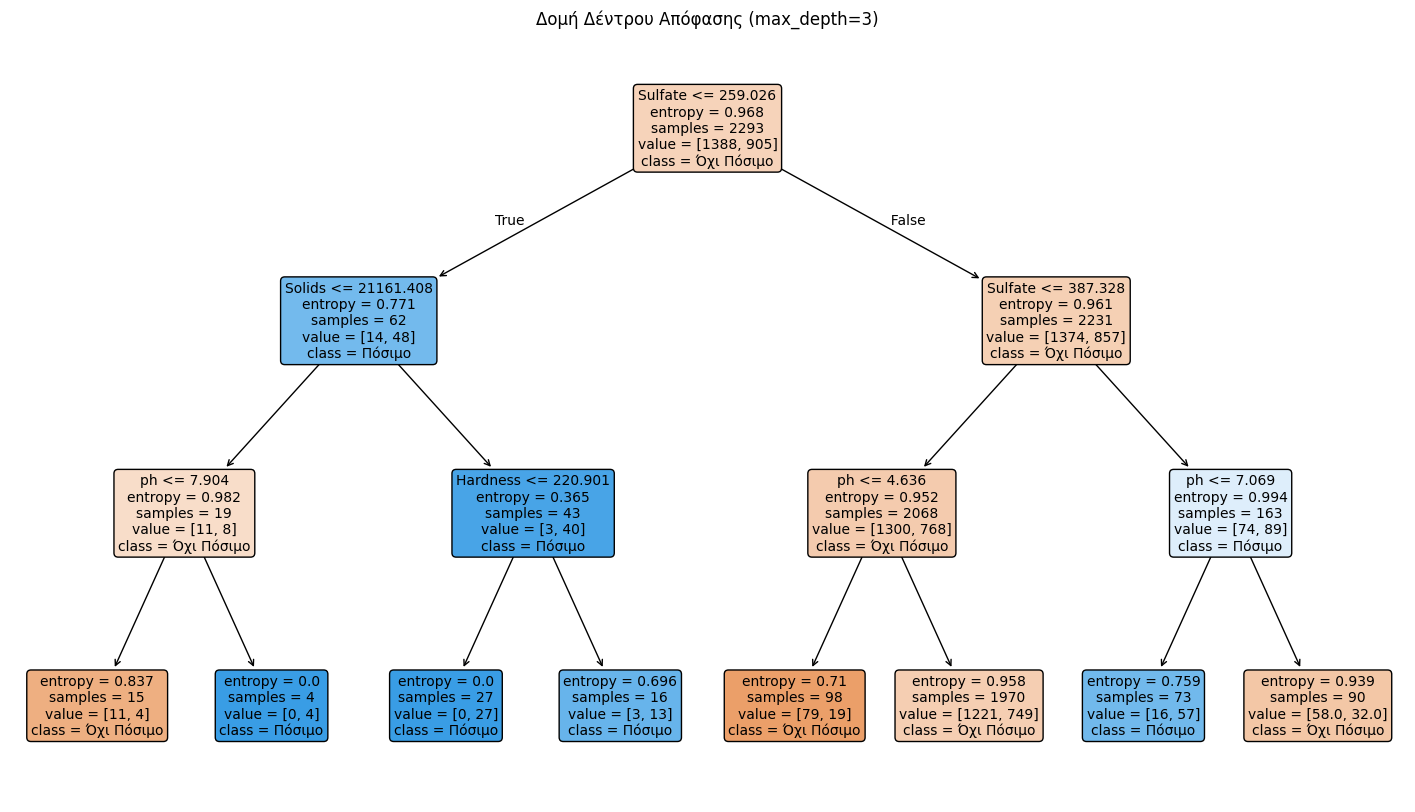

In [18]:
plt.figure(figsize=(18, 10))
plot_tree(
    best_tree,
    feature_names=df.drop(columns=['Potability']).columns,
    class_names=['Όχι Πόσιμο', 'Πόσιμο'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Δομή Δέντρου Απόφασης (max_depth=3)")
plt.show()


Περιγραφή των κανόνων που εξήγαγε το δέντρο.

Το δέντρο χρησιμοποιεί κυρίως τις μεταβλητές Sulfate, Solids, Hardness και pH για να αποφασίσει αν το νερό είναι πόσιμο ή μη πόσιμο.

Αν το Sulfate ≤ 259.026 mg/L, τότε το δέντρο εξετάζει τις συγκεντρώσεις Solids.

Αν τα Solids ≤ 21161.408 mg/L, τότε το νερό θεωρείται πόσιμο, εκτός αν το pH ≤ 7.904, όπου τείνει να είναι μη πόσιμο.

Αν τα Solids > 21161.408 mg/L, το νερό είναι πόσιμο, ειδικά όταν η Hardness ≤ 220.9 mg/L.

Συμπερασματικά, τα δείγματα με χαμηλό Sulfate και χαμηλό Hardness καταλήγουν ως πόσιμα.



# Ερώτημα 9

Επιλογή γραμμής με βάση την καλύτερη ακρίβεια στο test set

In [19]:
best_row = results_df.loc[results_df['test_acc'].idxmax()]

print("Γραμμή με τη μεγαλύτερη ακρίβεια στο test set:\n")
print(best_row)

Γραμμή με τη μεγαλύτερη ακρίβεια στο test set:

criterion            entropy
max_depth                5.0
min_samples_split          2
min_samples_leaf           2
max_features            None
ccp                      0.0
train_acc             0.6712
test_acc              0.6551
Name: 84, dtype: object


Επανεκπαίδευση του Δέντρου σύμφωνα με τις νέες παραμέτρους

In [20]:
best_tree = DecisionTreeClassifier(
    criterion=str(best_row['criterion']),
    max_depth=int(best_row['max_depth']) if not pd.isna(best_row['max_depth']) else None,
    min_samples_split=int(best_row['min_samples_split']),
    min_samples_leaf=int(best_row['min_samples_leaf']),
    max_features=None if pd.isna(best_row['max_features']) else str(best_row['max_features']),
    ccp_alpha=float(best_row['ccp']),
    random_state=0
)

best_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=0)

Δημιουργία ραβδογράμματος με τη σημαντικότητα κάθε χαρακτηριστικού

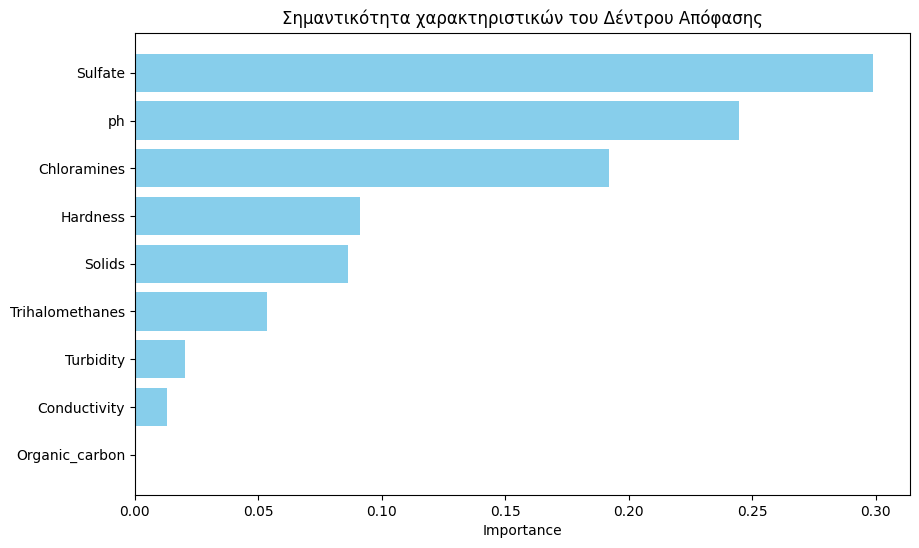

In [21]:
feature_names = ['ph', 'Hardness', 'Solids', 'Chloramines',
                 'Sulfate', 'Conductivity', 'Organic_carbon',
                 'Trihalomethanes', 'Turbidity']

feature_importances = best_tree.feature_importances_

feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Σημαντικότητα χαρακτηριστικών του Δέντρου Απόφασης')
plt.show()

Αν η συσκευή μπορεί να υποστηρίζει μέχρι 5 χημικές αναλύσεις, ποια χαρακτηριστικά θα έπρεπε να εξάγει από το νερό?

Αν η συσκευή είχε περιορισμό ως προς τις χημικές αναλύσεις και μπορούσε να υποστηρίξει μονο 5 χημικές αναλύσεις αυτές θα έπρεπε να είναι τα χαρακτηριστικά με την μεγαλύτερη σημαντικότητα στο Δέντρο Απόφασης.

Αυτά όπως φαίνεται στο ραβδόγραμμα είναι τα Sulfate, ph, Chloramines, Hardness και Solid

# Ερώτημα 10

Ένα Τυχαίο Δάσος (Random Forest) συνήθως επιτυγχάνει υψηλότερη ακρίβεια από ένα Δέντρο Απόφασης (Decision Tree), επειδή βασίζεται στον συνδυασμό πολλών δέντρων που εκπαιδεύονται σε διαφορετικά υποσύνολα δεδομένων και χαρακτηριστικών. Αυτή η προσέγγιση μειώνει την υπερπροσαρμογή και τη διακύμανση που εμφανίζει ένα μεμονωμένο δέντρο, οδηγώντας σε πιο σταθερές και γενικεύσιμες προβλέψεις. Επιπλέον, η τυχαιότητα στην επιλογή δεδομένων και χαρακτηριστικών αυξάνει την ποικιλία των δέντρων, με αποτέλεσμα το μοντέλο να αποδίδει καλύτερα σε νέα, άγνωστα δεδομένα, διατηρώντας παράλληλα υψηλή ακρίβεια.

# Ερώτημα 11

Εκπαίδευση Random Forest για πλήθος (n_estimators) 50, 100 και 200 δέντρα, και Εμφάνιση αποτελεσμάτων Accurancy στο train και test set

In [23]:
n_estimators_list = [50, 100, 200]

train_accuracies = []
test_accuracies = []

for n in n_estimators_list:

    rf_clf = RandomForestClassifier(n_estimators=n, random_state=0)

    rf_clf.fit(x_train, y_train)

    y_pred_train = rf_clf.predict(x_train)
    y_pred_test = rf_clf.predict(x_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)

print("Αποτελέσματα Random Forest Classifier:\n")

rf_results = pd.DataFrame({
    'n_estimators': n_estimators_list,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

display(rf_results)


Αποτελέσματα Random Forest Classifier:



,n_estimators,Train Accuracy,Test Accuracy
0,50,1.0,0.693795
1,100,1.0,0.697864
2,200,1.0,0.689725


# Ερώτημα 12

Τι είναι πιο σημαντικό για το μοντέλο, να προβλέπει καλά το πόσιμο νερό, αλλά χάνοντας ακρίβεια από το μη-πόσιμο νερό ή να προβλέπει καλύτερα το μη-πόσιμο νερό, χάνοντας ακρίβεια από το πόσιμο?

Για το πρόβλημα της ποιότητας νερού, είναι προτιμότερο το μοντέλο να είναι πιο αυστηρό και να εντοπίζει με ακρίβεια το μη πόσιμο νερό, ακόμα κι αν αυτό σημαίνει ότι μερικά δείγματα πόσιμου νερού θα χαρακτηριστούν λανθασμένα ως μη πόσιμα.   

Αυτό διότι η κατανάλωση νερού που νομίζουμε οτι ειναι πόσιμο ενω τελικά δεν είναι μπορεί να προκαλέσει προβλήματα στην υγεία του ανθρώπου που το κατανάλωσε.

# Ερώτημα 13

Τι είναι νομικά ασφαλέστερο για την εταιρία, η χρήση του καλύτερου δέντρου ή του καλύτερου τυχαίου δάσους?

Από νομική άποψη, ένα Δέντρο Απόφασης θεωρείται πιο «ασφαλές», γιατί είναι απλό και ερμηνεύεται εύκολα, επιτρέποντας την τεκμηρίωση και εξήγηση των αποφάσεων σε περίπτωση ελέγχου ή ευθυνών. Αντίθετα, το Τυχαίο Δάσος, αν και συχνά πιο ακριβές και σταθερό στις προβλέψεις του, δυσχεραίνει την τεκμηρίωση, γεγονός που μπορεί να δημιουργήσει προβλήματα νομικής ευθύνης. Στην πράξη καλή ιδέα θα ήταν να συνδυαστούν και τα δύο Random Forest για καλύτερη ακρίβεια, αλλά να  διατηρούν απλά δέντρα ή κανόνες για εξήγηση και τεκμηρίωση.
Αν όμως θα έπρεπε να επιλέξω ένα ως πιο ασφαλές θα ήταν το Δέντρο Απόφασης